In [0]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
from math import sqrt
from random import seed
import numpy as np
import pandas as pd

In [2]:
TotalCities= 10;
citynames=[]
citynames =np.arange(0,TotalCities)
print(citynames)

[0 1 2 3 4 5 6 7 8 9]


In [0]:
def distance(cities):
    data = dict()
    for i, value in enumerate(cities):
        pointa1 = cities[i][0]
        pointb1 = cities[i][1]
        if i + 1 <= len(cities)-1:
            pointa2 = cities[i+1][0]
            pointb2 = cities[i+1][1]
            a_cord = pointa2 - pointa1
            b_cord = pointb2 - pointb1
            ab = a_cord*a_cord + b_cord*b_cord
            c_cord = sqrt(ab)
            data['Distance from city '+ str(i+1) +' to city ' + str(i+2)] = c_cord 
        elif i + 1 > len(cities)-1:
            pointa2 = cities[0][0]
            pointb2 = cities[0][1]
            a_cord = pointa2 - pointa1
            b_cord = pointb2 - pointb1
            ab = a_cord*a_cord + b_cord*b_cord
            c_cord = sqrt(ab)
            data['Distance from city '+ str(i+1) +' to city ' + str(i+2-len(cities))] = c_cord
    return data


In [4]:
citylist = []
for x in range(0,TotalCities):
    x = np.random.rand(TotalCities,2)*100
    citylist.append(citylist)
    citylist = x.tolist()    
    val = distance(citylist).values()
print(val)

dict_values([56.97431165354474, 14.334078604425699, 37.06844921823497, 48.67672603811123, 16.96448602426731, 4.873792769181776, 67.16670165288983, 85.40608649423456, 89.24069810395402, 26.76406930188538])


In [5]:
def totaldistance(cities):
    total = sum(distance(cities).values())
    return total
totaldistance(citylist)

447.4693998607295

In [6]:
def calculatingcitypath(cities):
    path = random.sample(cities, len(cities))
    print(path)
    return path
    
listitem= calculatingcitypath(citylist)
print(listitem)

[[33.11503240566389, 99.44956616070714], [59.5785729749742, 62.876958984522815], [81.76881647343961, 97.95525907192379], [69.72486317556995, 85.0783604994959], [62.53764206068596, 76.90228320836304], [74.05684371721898, 82.84502206931951], [53.19837137421292, 19.97658725430702], [4.661305637230184, 47.70573831675853], [27.365329966980855, 33.53384060225984], [90.1065362347708, 96.9959807658542]]
[[33.11503240566389, 99.44956616070714], [59.5785729749742, 62.876958984522815], [81.76881647343961, 97.95525907192379], [69.72486317556995, 85.0783604994959], [62.53764206068596, 76.90228320836304], [74.05684371721898, 82.84502206931951], [53.19837137421292, 19.97658725430702], [4.661305637230184, 47.70573831675853], [27.365329966980855, 33.53384060225984], [90.1065362347708, 96.9959807658542]]


In [7]:
def initialpop(cities, popsize):
    population = [calculatingcitypath(cities) for i in range(0, popsize)]
    return population
population = initialpop(citylist,TotalCities)

[[27.365329966980855, 33.53384060225984], [53.19837137421292, 19.97658725430702], [69.72486317556995, 85.0783604994959], [74.05684371721898, 82.84502206931951], [81.76881647343961, 97.95525907192379], [62.53764206068596, 76.90228320836304], [4.661305637230184, 47.70573831675853], [90.1065362347708, 96.9959807658542], [59.5785729749742, 62.876958984522815], [33.11503240566389, 99.44956616070714]]
[[69.72486317556995, 85.0783604994959], [81.76881647343961, 97.95525907192379], [33.11503240566389, 99.44956616070714], [90.1065362347708, 96.9959807658542], [74.05684371721898, 82.84502206931951], [62.53764206068596, 76.90228320836304], [53.19837137421292, 19.97658725430702], [59.5785729749742, 62.876958984522815], [4.661305637230184, 47.70573831675853], [27.365329966980855, 33.53384060225984]]
[[59.5785729749742, 62.876958984522815], [53.19837137421292, 19.97658725430702], [4.661305637230184, 47.70573831675853], [74.05684371721898, 82.84502206931951], [62.53764206068596, 76.90228320836304], [

In [8]:
def fitnessofcities(cities):
    fitness= 0.0
    if fitness == 0:
        fitness = 1 / totaldistance(cities)
    #print(fitness)
    return fitness
fitnessofcities(citylist)



0.00223478968687298

In [21]:
def rankcitybypath(population):
    score = {}
    for i in range(len(population)):
        score[i] = fitnessofcities(population[i])
        
    return sorted(score.items())
rankcitybypath(population)


[(0, 0.0021401734006960874),
 (1, 0.002443637576342635),
 (2, 0.002397434705209475),
 (3, 0.001877622963261523),
 (4, 0.002067696064573408),
 (5, 0.0025051086294875886),
 (6, 0.0018180752768412098),
 (7, 0.0020503407593573187),
 (8, 0.001740531501960804),
 (9, 0.00199870882829818)]

In [22]:
def rolselectionprocess(pop, elitesize):
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
    df['totalsum'] = df.Fitness.cumsum()
    df['pr'] = 100*df.totalsum/df.Fitness.sum()
    chosenvalues = [pop[i][0] for i in range(elitesize)]
    for i in range(len(pop) - elitesize):
        choose = 100*random.random()
        for i in range(0, len(pop)):
            if choose <= df.iat[i,3]:
                chosenvalues.append(pop[i][0])
                break
        return chosenvalues
pop = rankcitybypath(population)
chosenvalues = rolselectionprocess(pop,4)
print(chosenvalues)

[0, 1, 2, 3, 9]


In [23]:
def matingprocess(population, chosenvalues):
    matingpool = [] 
    for i in range(0, len(chosenvalues)):
        l = chosenvalues[i]
        matingpool.append(population[l])
    return matingpool
matepoolresult = matingprocess(population, chosenvalues)
print(matepoolresult)

[[[27.365329966980855, 33.53384060225984], [53.19837137421292, 19.97658725430702], [69.72486317556995, 85.0783604994959], [74.05684371721898, 82.84502206931951], [81.76881647343961, 97.95525907192379], [62.53764206068596, 76.90228320836304], [4.661305637230184, 47.70573831675853], [90.1065362347708, 96.9959807658542], [59.5785729749742, 62.876958984522815], [33.11503240566389, 99.44956616070714]], [[69.72486317556995, 85.0783604994959], [81.76881647343961, 97.95525907192379], [33.11503240566389, 99.44956616070714], [90.1065362347708, 96.9959807658542], [74.05684371721898, 82.84502206931951], [62.53764206068596, 76.90228320836304], [53.19837137421292, 19.97658725430702], [59.5785729749742, 62.876958984522815], [4.661305637230184, 47.70573831675853], [27.365329966980855, 33.53384060225984]], [[59.5785729749742, 62.876958984522815], [53.19837137421292, 19.97658725430702], [4.661305637230184, 47.70573831675853], [74.05684371721898, 82.84502206931951], [62.53764206068596, 76.90228320836304]

In [0]:
def crossingover(myparent1, myparent2):
    myparentgeneration1 = int(random.random() * len(myparent1))
    myparentgeneration2 = int(random.random() * len(myparent2))
    
    startofgeneration = min(myparentgeneration1, myparentgeneration2)
    endofgeneration = max(myparentgeneration1, myparentgeneration2)

    maskparent1 = []
    for i in range(startofgeneration, endofgeneration):
      m1 = myparent[i]
      maskparent1.append(startofgeneration[m1])
    return maskparent1
    
    maskparent2 = [i for i in myparent2 if i not in maskparent1]
   
    totmask = maskparent1 + maskparent2
    
    return totmask


In [36]:
def crossingovercities(matingprocess, elitesize):
    ln = len(matingprocess) - elitesize
    pl = random.sample(matingprocess, len(matingprocess))
    tot1 = [matingprocess[i] for i in range(elitesize)]
    tot2 = [crossingover(pl[i], pl[len(matingprocess)-i-1]) for i in range(ln)]
    totmask = tot1+tot2
    return totmask
crossingovercities(matepoolresult,5)

[[[27.365329966980855, 33.53384060225984],
  [53.19837137421292, 19.97658725430702],
  [69.72486317556995, 85.0783604994959],
  [74.05684371721898, 82.84502206931951],
  [81.76881647343961, 97.95525907192379],
  [62.53764206068596, 76.90228320836304],
  [4.661305637230184, 47.70573831675853],
  [90.1065362347708, 96.9959807658542],
  [59.5785729749742, 62.876958984522815],
  [33.11503240566389, 99.44956616070714]],
 [[69.72486317556995, 85.0783604994959],
  [81.76881647343961, 97.95525907192379],
  [33.11503240566389, 99.44956616070714],
  [90.1065362347708, 96.9959807658542],
  [74.05684371721898, 82.84502206931951],
  [62.53764206068596, 76.90228320836304],
  [53.19837137421292, 19.97658725430702],
  [59.5785729749742, 62.876958984522815],
  [4.661305637230184, 47.70573831675853],
  [27.365329966980855, 33.53384060225984]],
 [[59.5785729749742, 62.876958984522815],
  [53.19837137421292, 19.97658725430702],
  [4.661305637230184, 47.70573831675853],
  [74.05684371721898, 82.84502206931

In [0]:
def mutate(singlechild, mutationrate):
    for swap in range(len(singlechild)):
        if(random.random() < mutationrate):
            swapwith = int(random.random() * len(singlechild))
            city1 = singlechild[swap]
            city2 = singlechild[swapwith]
            singlechild[swap] = city2
            singlechild[swapwith] = city1
            print(singlechild)
    return singlechild

In [45]:
def mutateall(population, mutationrate):
    for i in range(len(population)):
        mutatedpopulation = mutate(population[i], mutationrate)
        return mutatedpopulation
mutateall(population, 0.05)

[[27.365329966980855, 33.53384060225984], [53.19837137421292, 19.97658725430702], [69.72486317556995, 85.0783604994959], [74.05684371721898, 82.84502206931951], [81.76881647343961, 97.95525907192379], [62.53764206068596, 76.90228320836304], [4.661305637230184, 47.70573831675853], [90.1065362347708, 96.9959807658542], [59.5785729749742, 62.876958984522815], [33.11503240566389, 99.44956616070714]]


[[27.365329966980855, 33.53384060225984],
 [53.19837137421292, 19.97658725430702],
 [69.72486317556995, 85.0783604994959],
 [74.05684371721898, 82.84502206931951],
 [81.76881647343961, 97.95525907192379],
 [62.53764206068596, 76.90228320836304],
 [4.661305637230184, 47.70573831675853],
 [90.1065362347708, 96.9959807658542],
 [59.5785729749742, 62.876958984522815],
 [33.11503240566389, 99.44956616070714]]

In [16]:
def creatingfuturegeneration(presentgeneration, elitesize, mutationrate):
    pop = rankcitybypath(presentgeneration)
    chosenvalues = rolselectionprocess(pop, elitesize)
    mymatingpool = matingprocess(presentgeneration, chosenvalues)
    totmask = crossingovercities(mymatingpool, elitesize)
    creatingfuturegeneration = mutate(totmask, mutationrate)
    return creatingfuturegeneration
creatingfuturegeneration(population, 5, 0.05)

[[[4.661305637230184, 47.70573831675853],
  [59.5785729749742, 62.876958984522815],
  [53.19837137421292, 19.97658725430702],
  [62.53764206068596, 76.90228320836304],
  [90.1065362347708, 96.9959807658542],
  [69.72486317556995, 85.0783604994959],
  [33.11503240566389, 99.44956616070714],
  [27.365329966980855, 33.53384060225984],
  [81.76881647343961, 97.95525907192379],
  [74.05684371721898, 82.84502206931951]],
 [[27.365329966980855, 33.53384060225984],
  [81.76881647343961, 97.95525907192379],
  [4.661305637230184, 47.70573831675853],
  [33.11503240566389, 99.44956616070714],
  [74.05684371721898, 82.84502206931951],
  [53.19837137421292, 19.97658725430702],
  [62.53764206068596, 76.90228320836304],
  [90.1065362347708, 96.9959807658542],
  [59.5785729749742, 62.876958984522815],
  [69.72486317556995, 85.0783604994959]],
 [[4.661305637230184, 47.70573831675853],
  [59.5785729749742, 62.876958984522815],
  [33.11503240566389, 99.44956616070714],
  [69.72486317556995, 85.07836049949

In [0]:
def getnames(resultlist, cities, namelist):
    names = []
    for index,value in enumerate(resultlist):
        for i,v in enumerate(cities):
            if value == v:
                names.append(namelist[i])
    return names

In [18]:
def mytspalgo(citynames,cities, populationsize, elitesize, mutationrate, generations):
    population = initialpop(cities,populationsize)
   
    print("Initial destination: " + str(1 / rankcitybypath(population)[0][1]))
    for i in range(generations):
        population = creatingfuturegeneration(population, elitesize, mutationrate)
        x = str(1 / rankcitybypath(population)[0][1])
    print("final destination: " + x)
        
    bestpathid = rankcitybypath(population)[0][0]
    bestpath = population[bestpathid]
    orderedcities = getnames(bestpath,cities,citynames)
    print([(index,val) for index,val in enumerate(orderedcities)])
    return bestpath

resultlist = mytspalgo(citynames,citylist, populationsize=100, 
                 elitesize=4, mutationrate=0.05, 
                 generations=500)

[[33.11503240566389, 99.44956616070714], [53.19837137421292, 19.97658725430702], [90.1065362347708, 96.9959807658542], [74.05684371721898, 82.84502206931951], [62.53764206068596, 76.90228320836304], [59.5785729749742, 62.876958984522815], [69.72486317556995, 85.0783604994959], [4.661305637230184, 47.70573831675853], [27.365329966980855, 33.53384060225984], [81.76881647343961, 97.95525907192379]]
[[4.661305637230184, 47.70573831675853], [62.53764206068596, 76.90228320836304], [69.72486317556995, 85.0783604994959], [90.1065362347708, 96.9959807658542], [59.5785729749742, 62.876958984522815], [74.05684371721898, 82.84502206931951], [33.11503240566389, 99.44956616070714], [53.19837137421292, 19.97658725430702], [81.76881647343961, 97.95525907192379], [27.365329966980855, 33.53384060225984]]
[[4.661305637230184, 47.70573831675853], [27.365329966980855, 33.53384060225984], [69.72486317556995, 85.0783604994959], [90.1065362347708, 96.9959807658542], [62.53764206068596, 76.90228320836304], [59

In [19]:
print("finalpath(index of city, city)", resultlist)

finalpath(index of city, city) [[74.05684371721898, 82.84502206931951], [59.5785729749742, 62.876958984522815], [27.365329966980855, 33.53384060225984], [53.19837137421292, 19.97658725430702], [81.76881647343961, 97.95525907192379], [4.661305637230184, 47.70573831675853], [33.11503240566389, 99.44956616070714], [90.1065362347708, 96.9959807658542], [69.72486317556995, 85.0783604994959], [62.53764206068596, 76.90228320836304]]


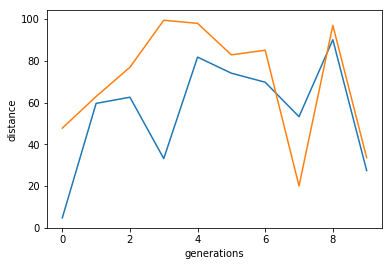

In [20]:
plt.plot(x)
plt.ylabel('distance')
plt.xlabel('generations')
plt.show()